In this example, we'll visualize a hard clustering of the classic iris dataset using KMeans.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

from clustervisualizer.ClusterAnalyzer import ClusterAnalyzer as clust

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'type']


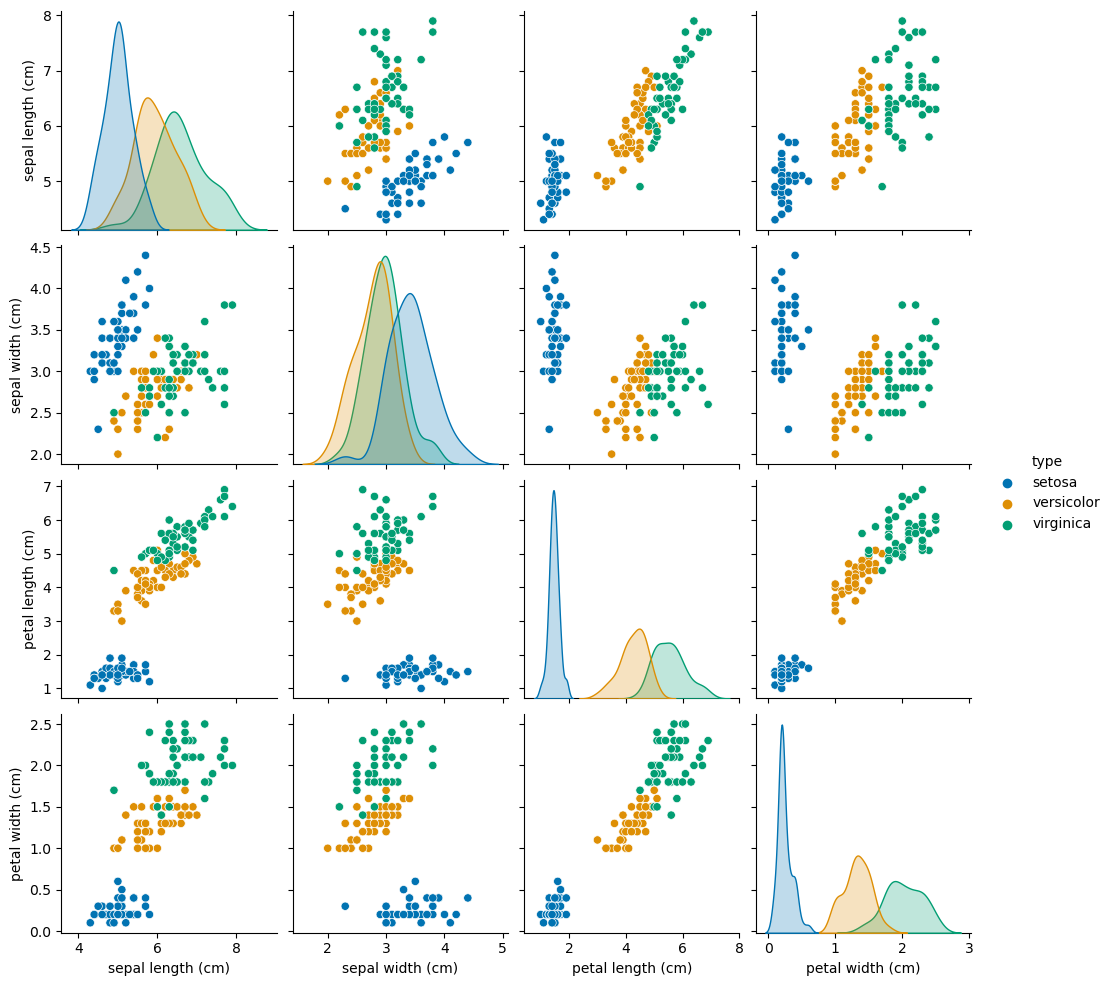

In [40]:
# Load iris data set ...
X, y = load_iris(as_frame=True, return_X_y=True)
# ... and add flower type to X dataframe
type_dict = { 0 : 'setosa',
              1 : 'versicolor',
              2 : 'virginica' }
X['type'] = [ type_dict[elem] for elem in y ]


# See data labels available
print( list(X) )


# Visualize correct distribution of flower cluster
sns.pairplot(X, hue='type', palette='colorblind')

In [41]:
# Cluster data using kmeans
kmeans_obj = KMeans(n_clusters=3, random_state=1)
fit_params = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
preds = kmeans_obj.fit_predict( X[fit_params] )

Let's visualize the *predictions* of KMeans...
(and note that even if the prediction is 100% accurate, the plotted colors may not be the same as the plot above).

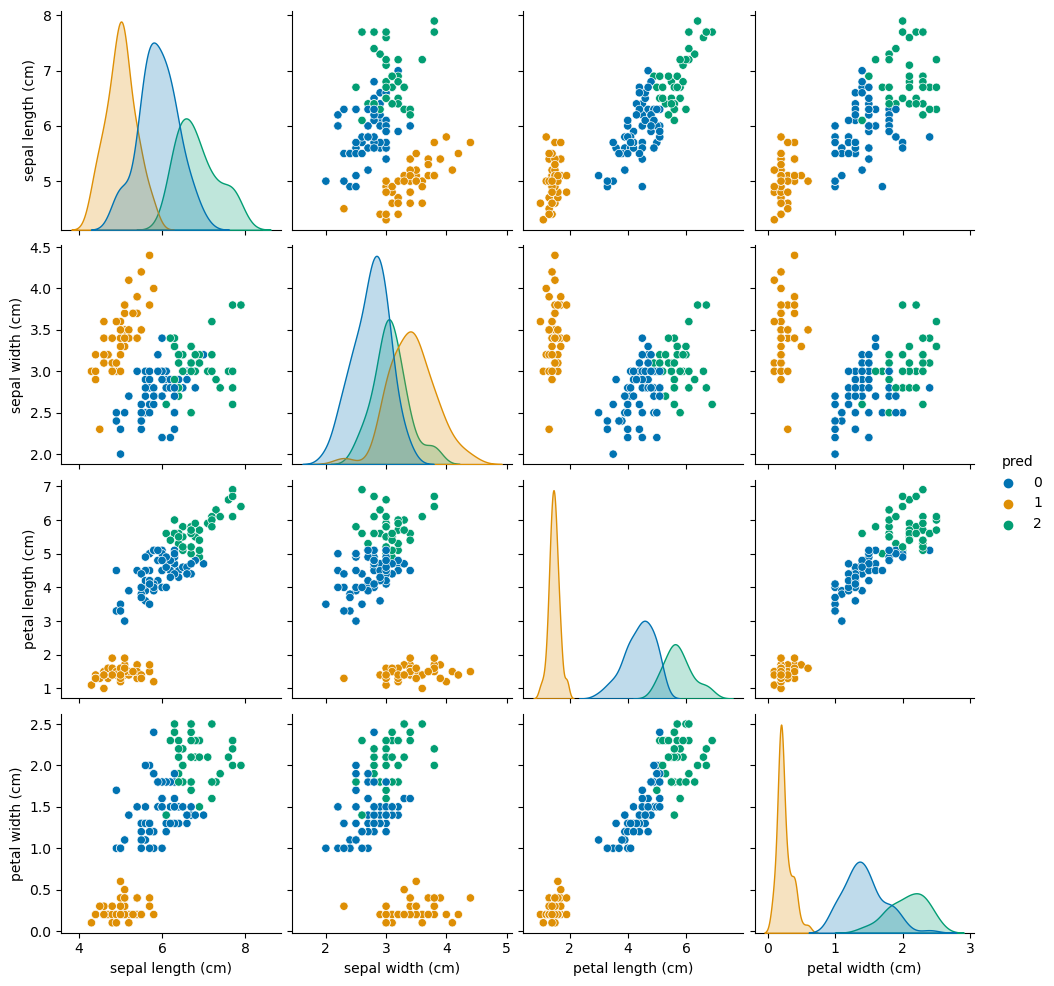

In [42]:
X['pred'] = preds
sns.pairplot(X, hue='pred', palette='colorblind')

Some of the clustering is correct... Comparing the original plot to the predictions plot, separating setosa (blue) from versicolor / virginica (orange / green) seems to be mostly right (evident from the petal width histograms). But the model struggles to distinguish all of versicolor from virginica. This is seen in the change in distribution shape of these two between the original pairsplot and the prediction pairsplot.

It might be handier to analyze the distribution of an entire feature and the in-cluster data *simultaneously*. This can be accomplished using the ClusterAnalyzer class of the clustervisualizer package.

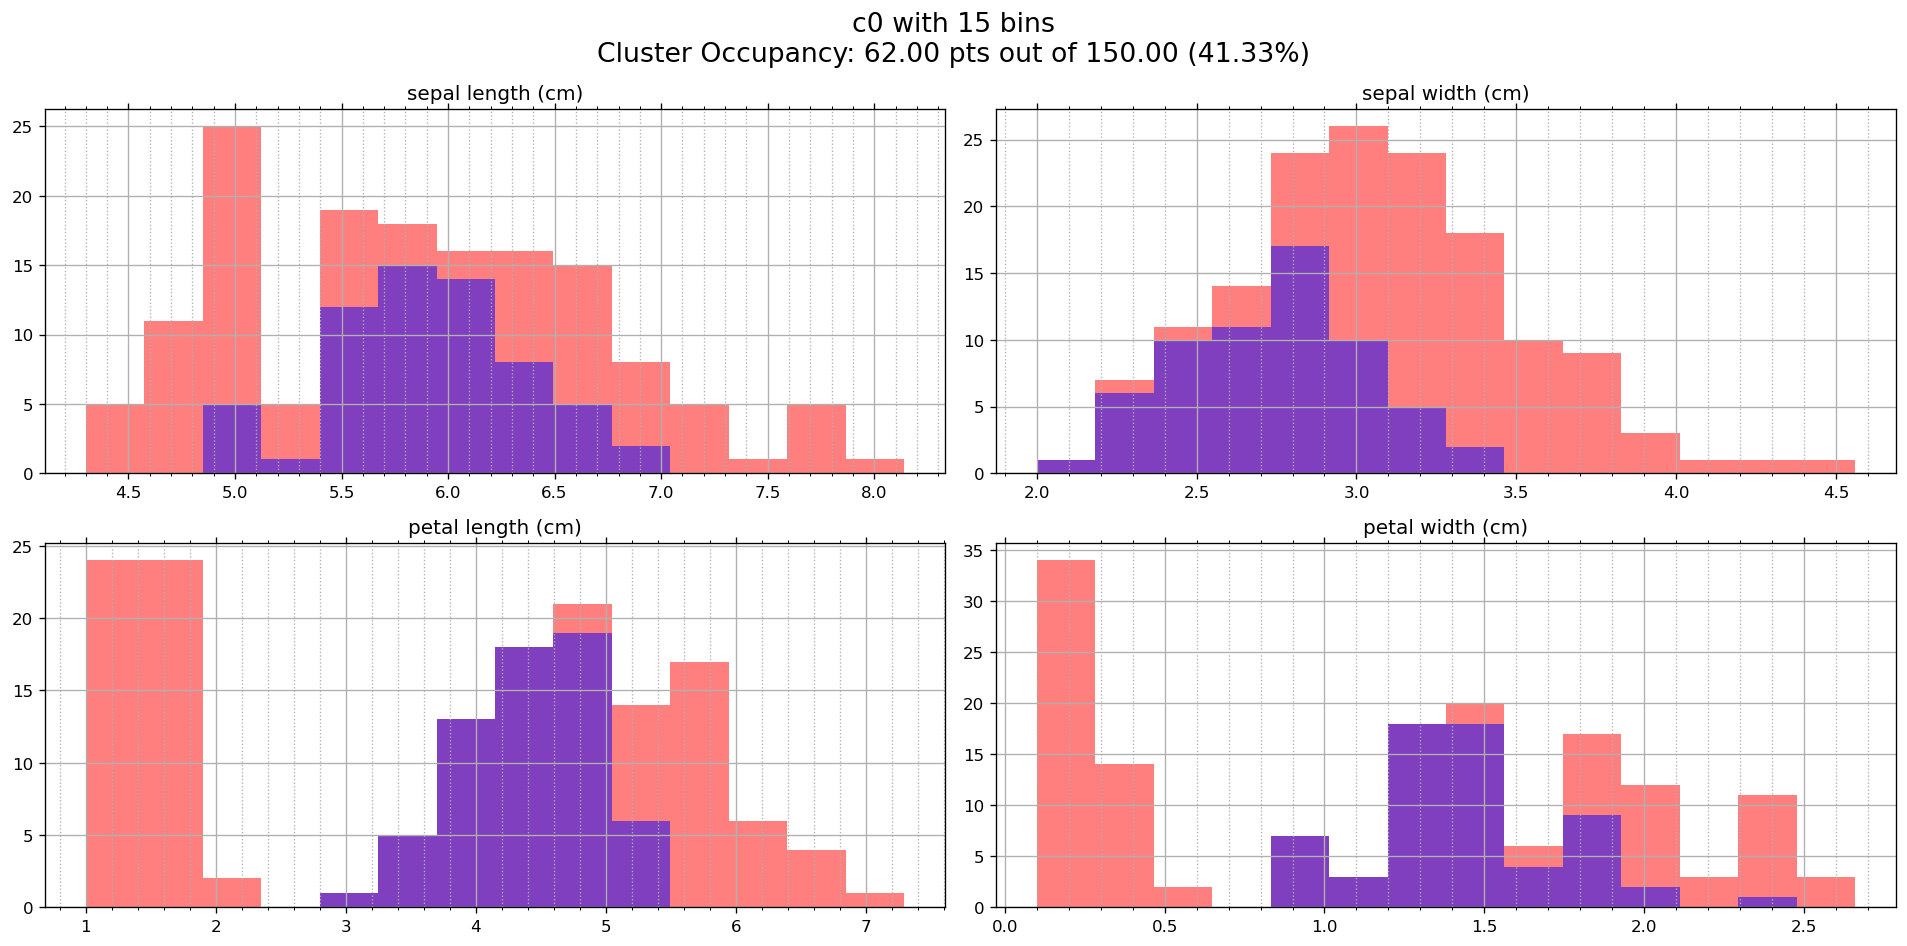

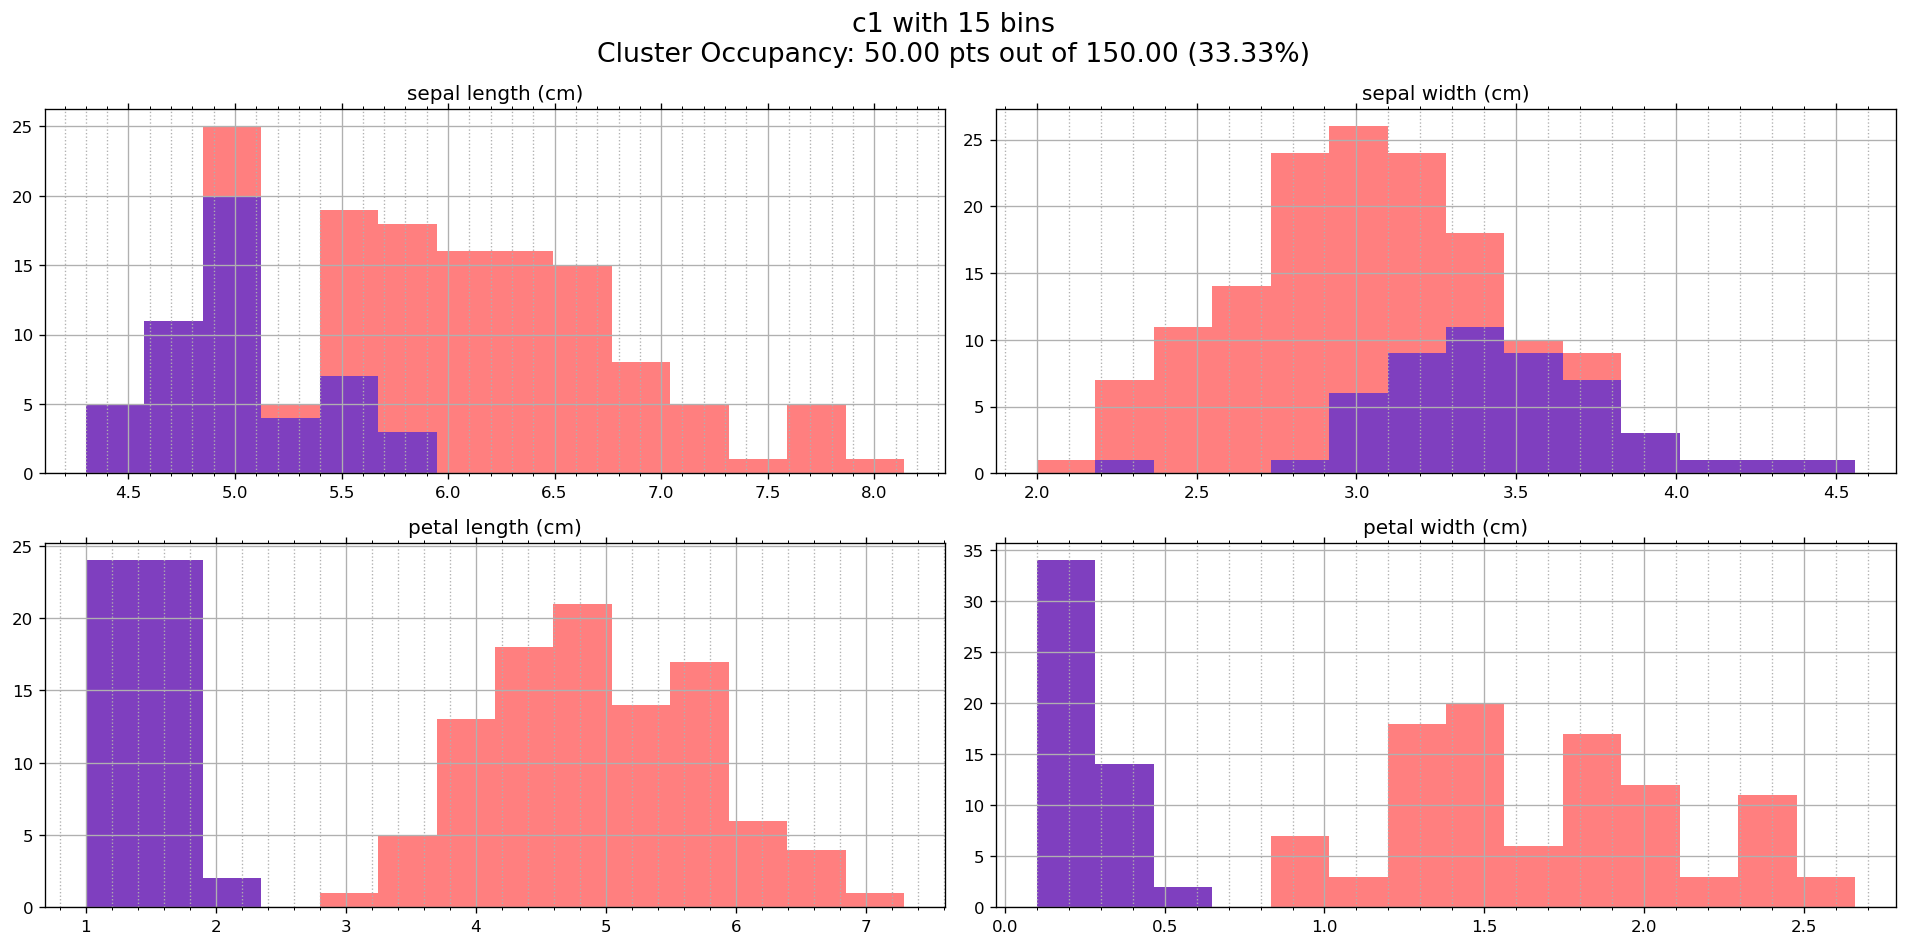

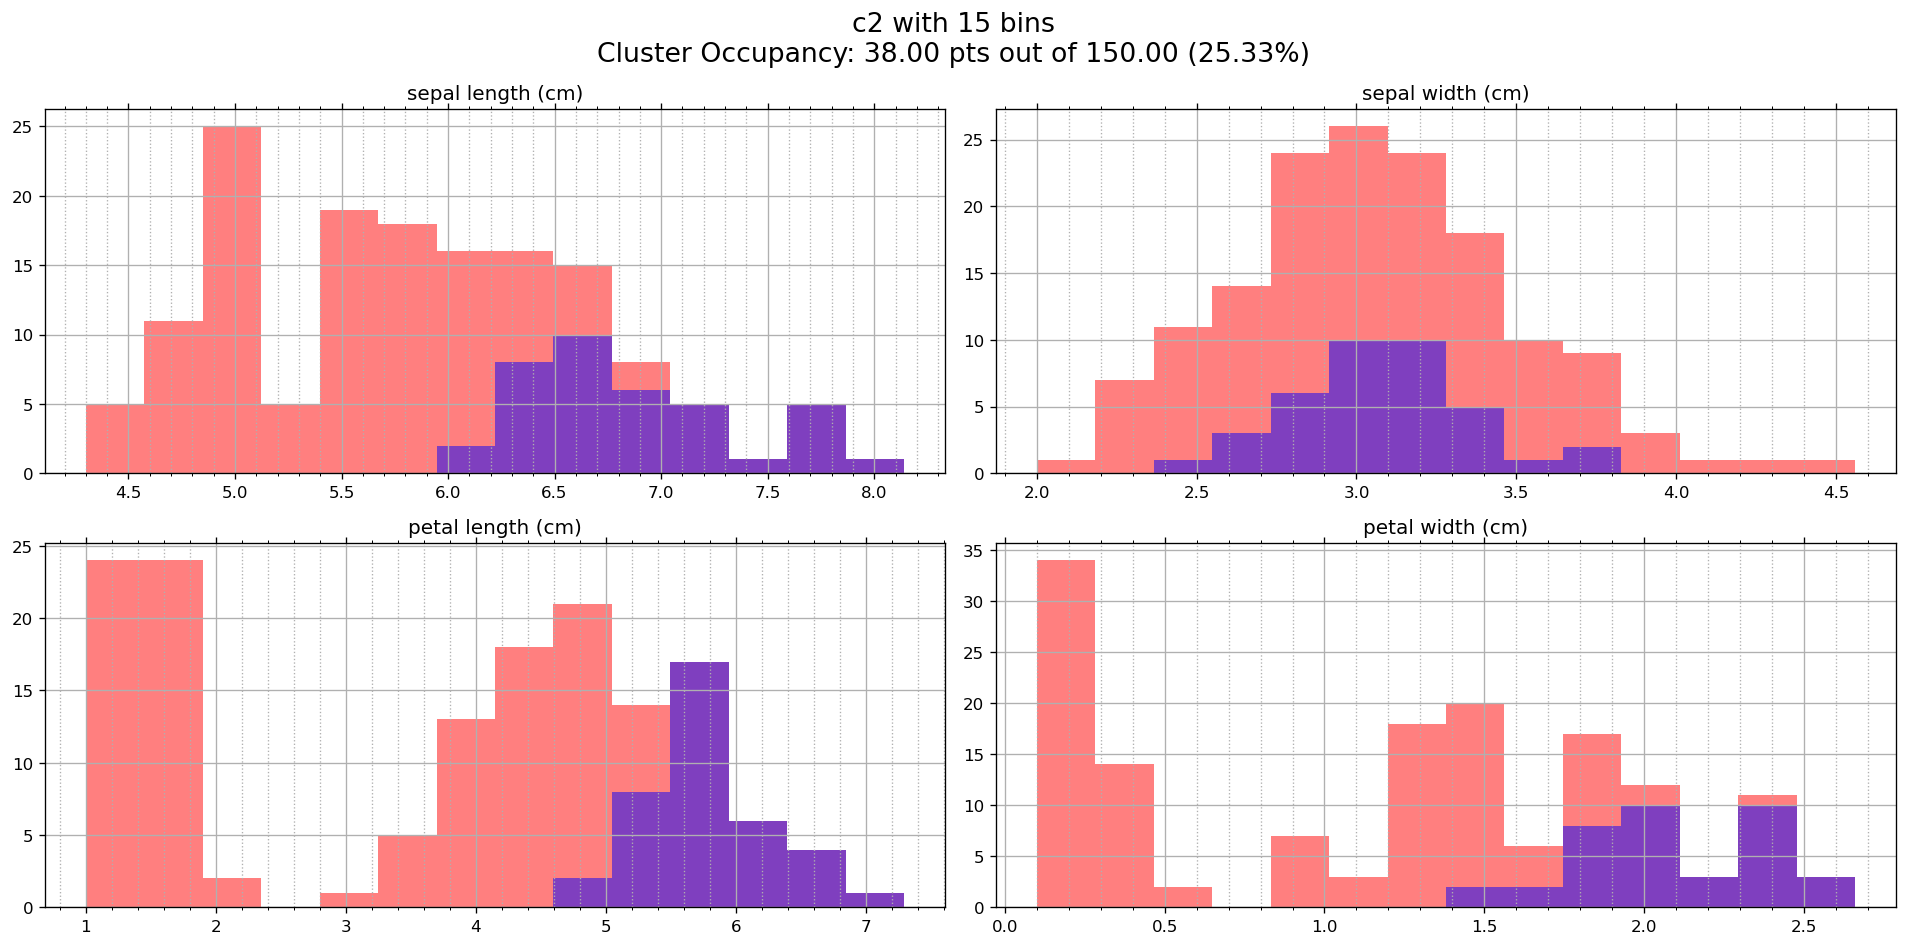

In [43]:
# Instantiate ClusterAnalyzer
clust1 = clust(
            X,   # dataframe to analyze
            preds   # 1d array of predictions (in this case)
              )

# Create histograms
clust1.hist1d(hist_vars=fit_params,
              bins=15)

Making the entire distribution the background (light red), the in-cluster distribution as the foreground (purple), and a set of these histograms for each cluster causes the predictions to be much more transparent. Included in each set of plots is the cluster name and occupancy (how many points of the data are in this cluster).

It's apparent from the plots that the classes best associated (but not perfectly!) with these clusters are c1 as setosa, c2 as virginica, and c0 as versicolor. We can rename these clusters using the rename_clusters function.

In [44]:
clust1.rename_clusters({'c1':'predicted_setosa',
                        'c0':'predicted_versicolor',
                        'c2':'predicted_virginica'})

The clusters can also be 'named' by passing a dict to the class constructor. The keys are the desired 'names' and the values are feature labels. The cluster that has the highest in-cluster average *for that label* will inherit that key as its name.

Additionally, instead of using the average, you can supply a different function and whichever cluster maximizes that function will inherit the name. This is done by supplying a 2-element tuple as the value where the 1st element is the label and the 2nd element is the function. Both cases are shown below.

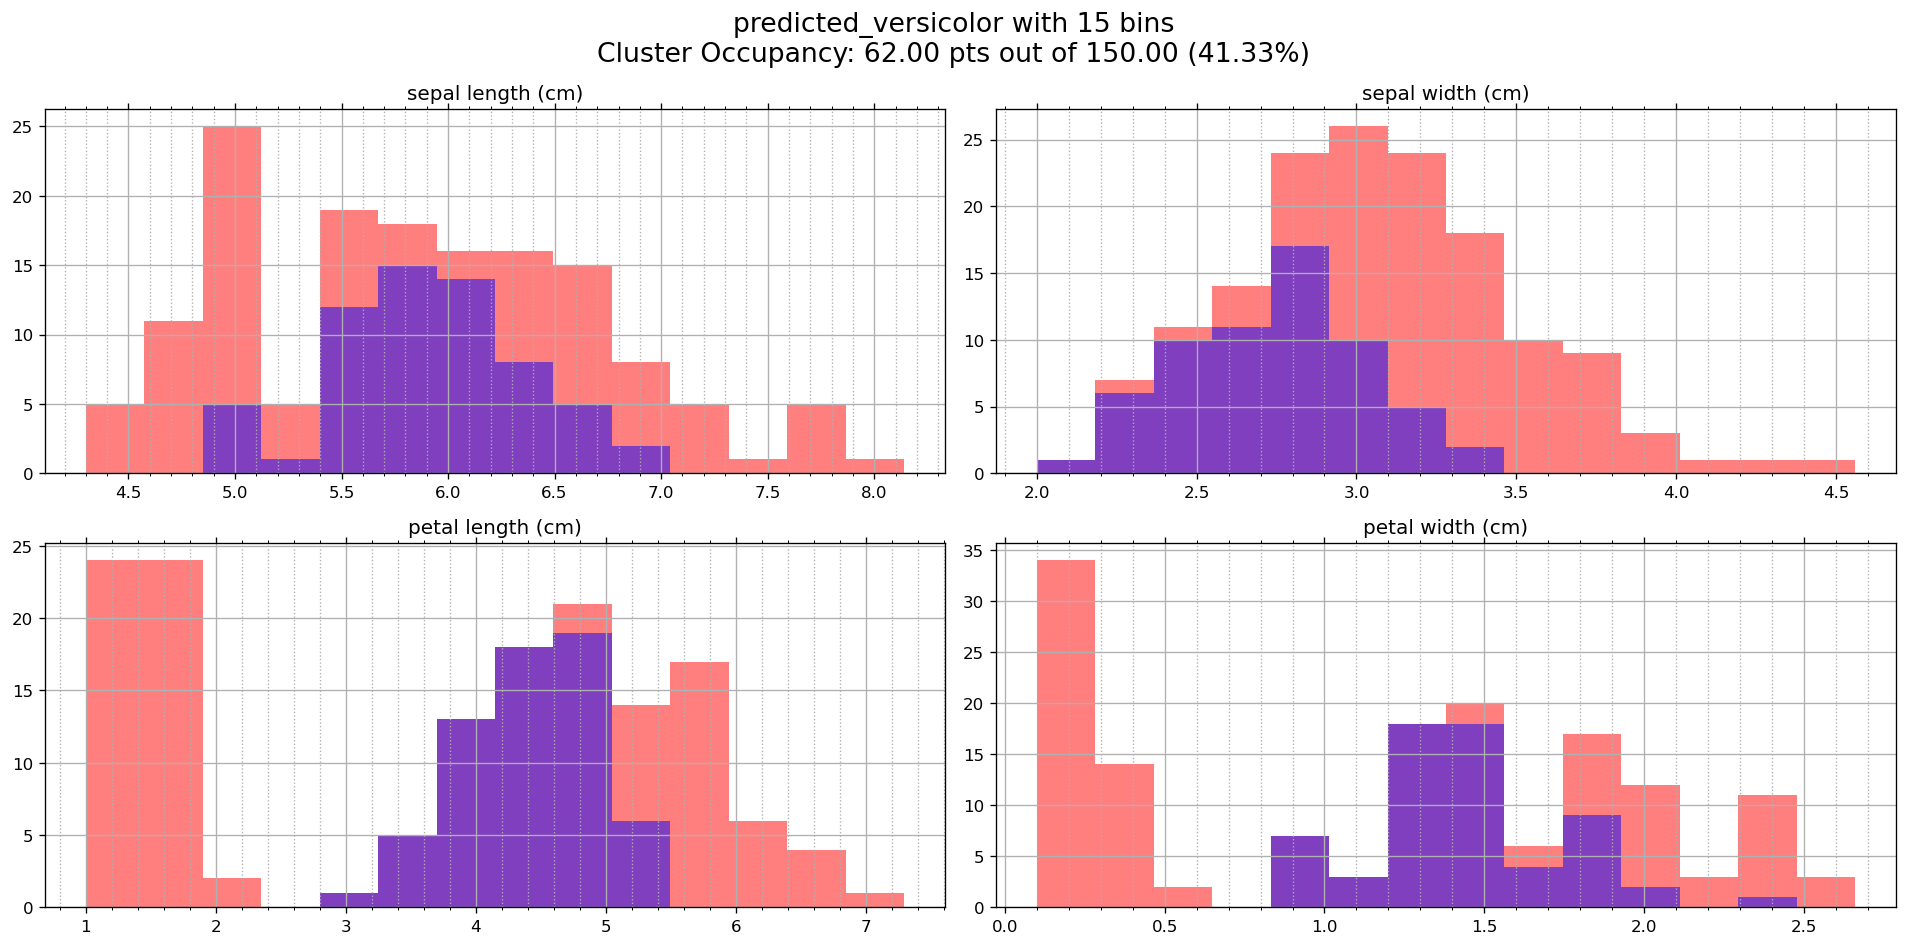

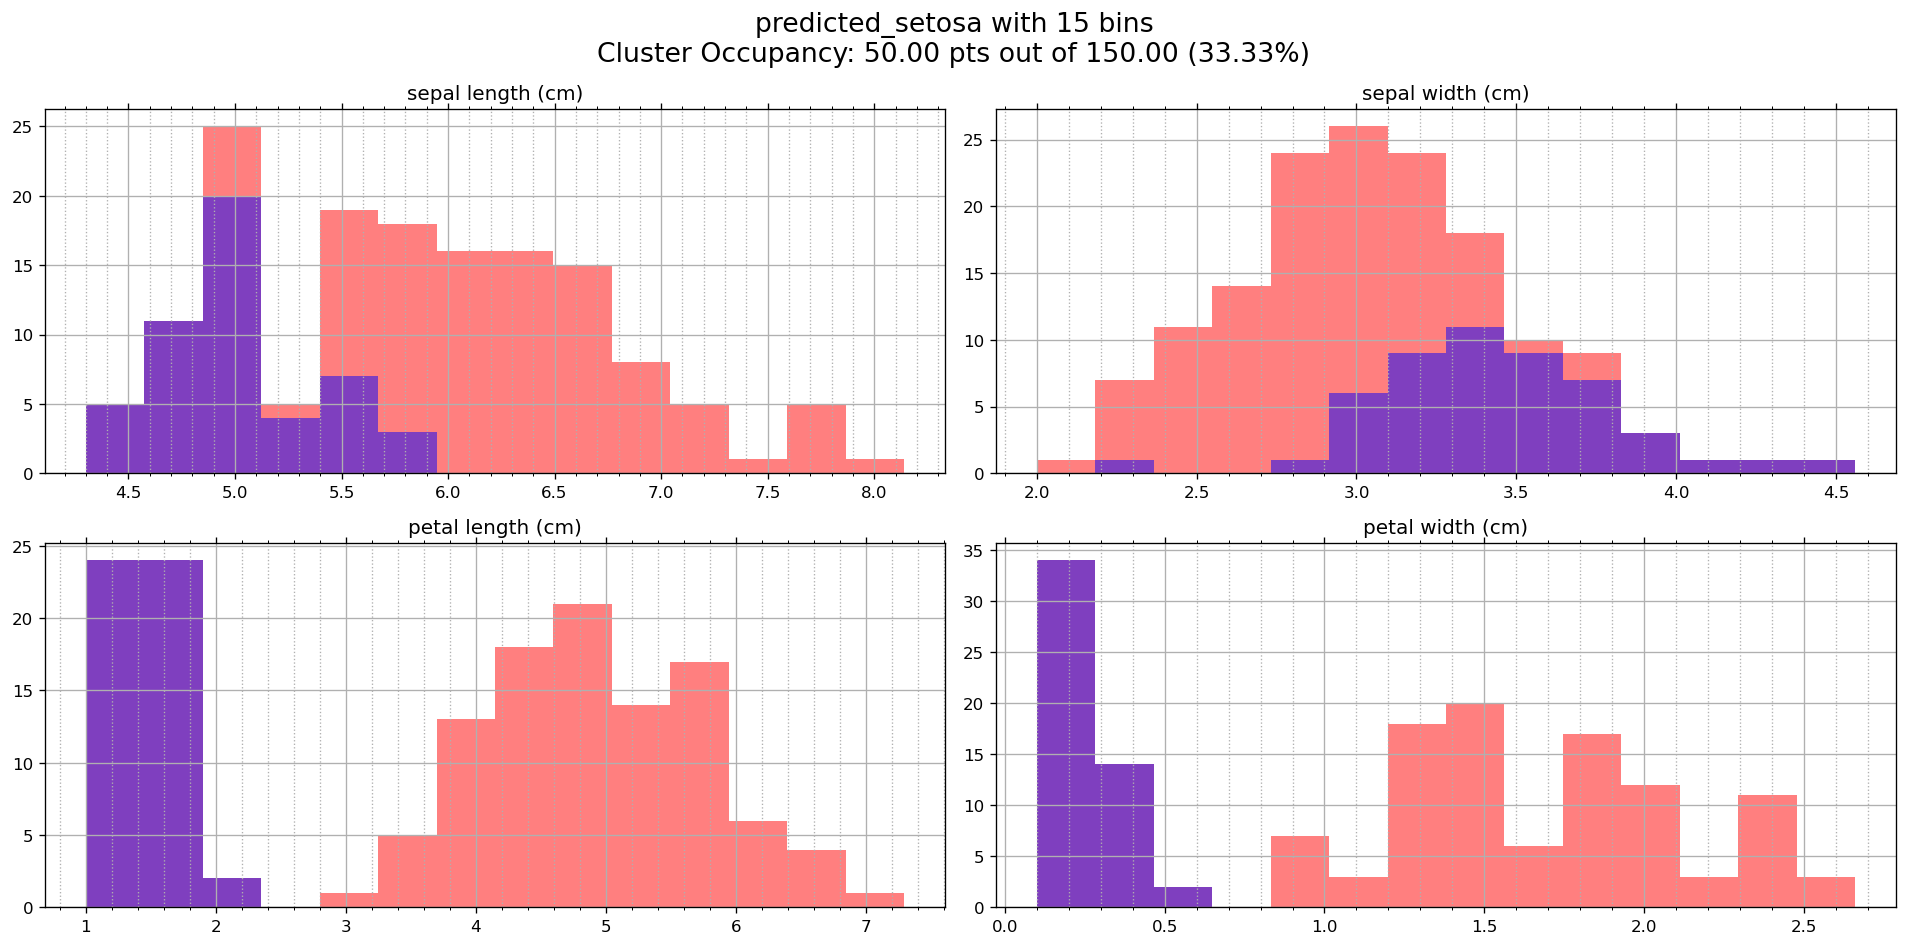

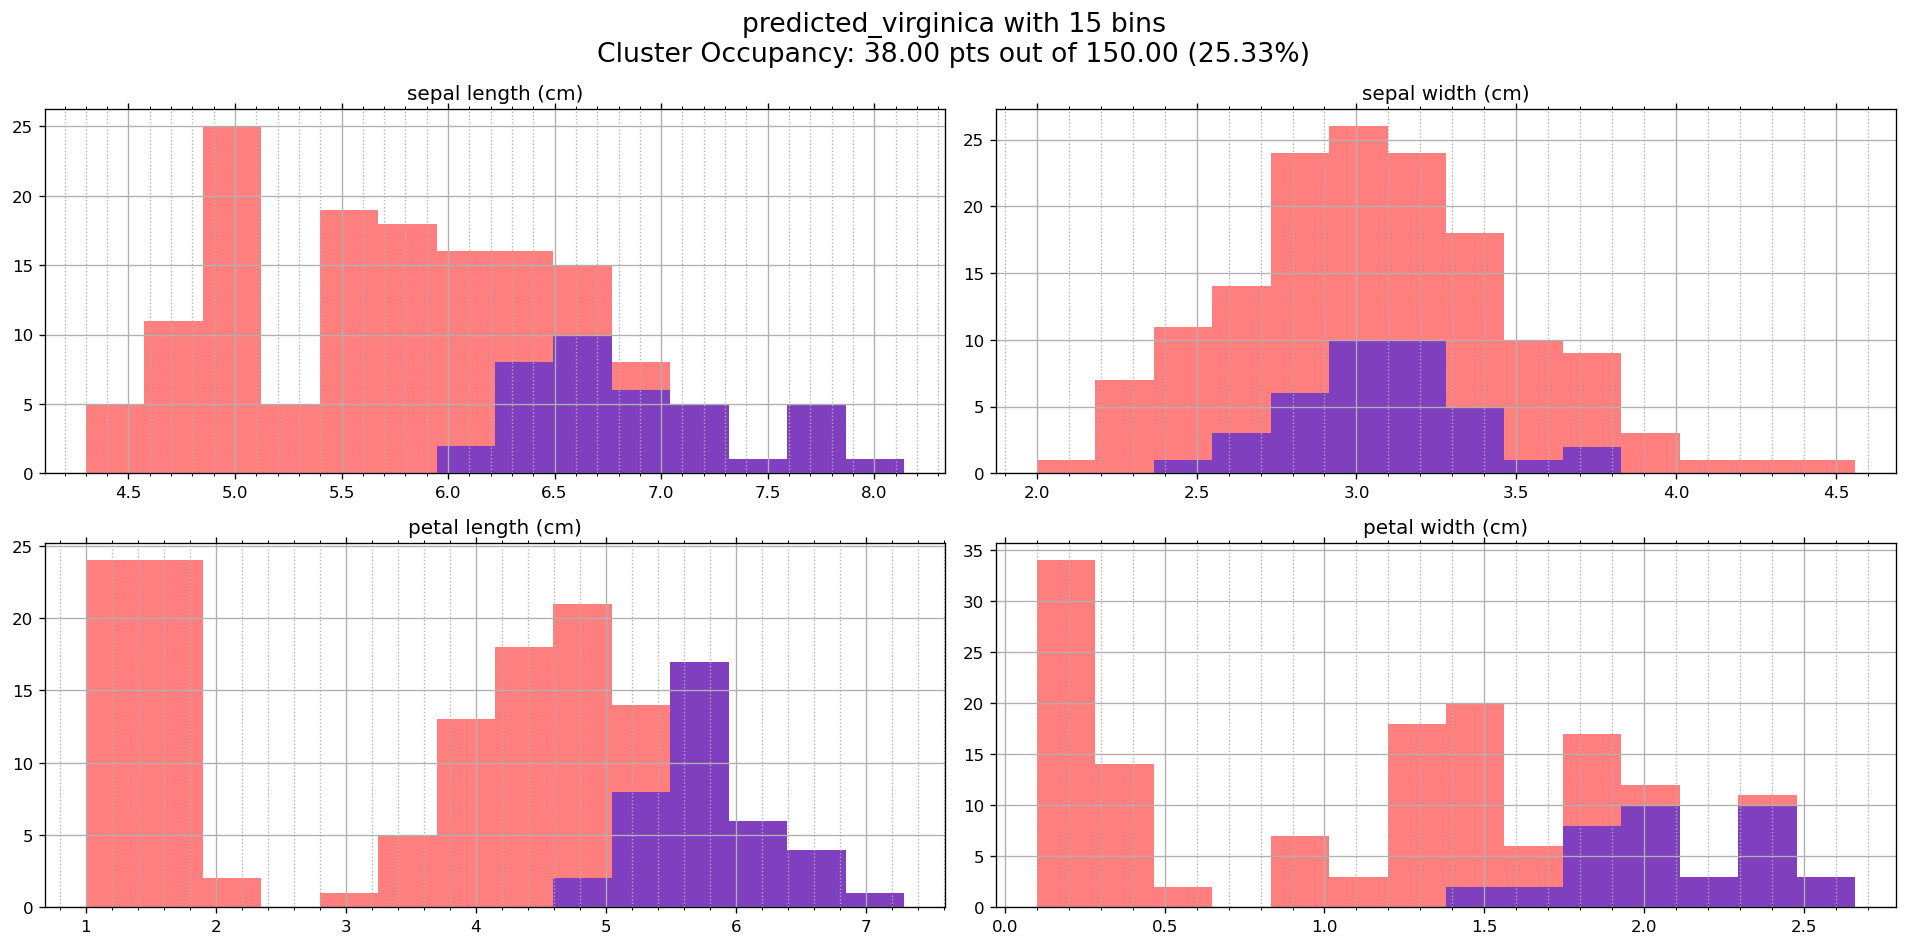

In [45]:
init_names = {
    'predicted_virginica': 'petal length (cm)',   # virginica has the highest avg in petal_length 
    'predicted_setosa': ('petal width (cm)', lambda x: -1*np.mean(x)),   # setosa has the lowest avg in petal_width
    'predicted_versicolor': ('sepal width (cm)', lambda x: -1*np.mean(x))   # versicolor has the lowest avg in sepal_width
             }
clust2 = clust(X, preds,
               name_clusters = init_names)
clust2.hist1d(bins=15, hist_vars=fit_params)